# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
%matplotlib inline

# **Dataset**

This class reads the data from .csv file, scales and splits the dataset depending upon the function that is called on the class object.

Scaling:


*   No scaling performed if scale_dataset is not called on the class object.
*   If scale_dataset is called on the class object, then two type of scaling can be performed:


1.   Between 0 and 1 (st=True)
2.   Between -1 and 1 (st=False)











Splitting Ratio:

*   Training Set: 60%
*   Validation Set: 20%
*   Testing Set: 20%

Note: If spilt_data is not called on the class object, no spliting of the data will take place.

## *Class Dataset*

In [2]:
class Dataset:
  
  #constructor
  def __init__(self,dir,remove_cols=[]): 
    
    # args: 
    # dir = (str)directory to dataset with last column as target values 
    # remove_cols = (list) name of columns which are not to be added in the dataset as list

    #read data file
    self.data=pd.read_csv(dir)
    
    #remove columns if not required in the features
    self.remove_cols = remove_cols # for saving in the file as metadata
    if remove_cols:
      self.data=self.data.drop(remove_cols, axis=1)

    #select all feature names (except target values)
    self.features= self.data.columns[0:-1]
    
    #store the target name 
    self.target=self.data.columns[-1] 

    #Variables used while scaling the dataset
    #default values have been provided as these will be saved as metadata in the file
    self.scale=False 
    self.scale_type=None
    self.min=None
    self.max=None 
  
  
  def scale_dataset(self,st):

    #this function carries out scaling of the features
    #it can either be between 0 and 1 or between -1 and 1 
    #set st=True for [0,1] and st=False for [-1,1]  
    
    self.scale=True
    self.scale_type=st

    self.min=self.data[self.features].min()
    self.max=self.data[self.features].max()

    if st:
      self.data[self.features] = self.data[self.features].apply(lambda x: (x-self.min)/(self.max-self.min), axis=1)
    else:
      self.data[self.features] = self.data[self.features].apply(lambda x: 2*((x-self.min)/(self.max-self.min))-1, axis=1)
     

  def split_data(self,train=False, test=False, valid=False):

    # this fucntion carries out the splitting of data into train, test, and validation datasets
    # depending upon which arg is set True.
    # Splitting ratio: 60% for  train, 20% for test, 20% for validation 
    # Only one arg should be set true when calling this function
    # otherwise the dataset of the arg which is in first in arg list will be returned.

    #random_state set for reproducibility
    train_data, test_data, valid_data = np.split(self.data.sample(frac=1, random_state=42), [int(0.6*len(self.data)), int(0.8*len(self.data))])

    if train:
      return (train_data[self.features].to_numpy(), train_data[self.target].to_numpy().reshape(-1,1))
    if test:
      return (test_data[self.features].to_numpy(), test_data[self.target].to_numpy().reshape(-1,1))
    if valid:
      return (valid_data[self.features].to_numpy(), valid_data[self.target].to_numpy().reshape(-1,1))



## *Worldwide Dataset*

In [3]:
#path to dataset 
dir_world ='/content/World_Data_Transformed.csv'

#                                 remove these features from the dataset
dataset_world = Dataset(dir=dir_world, remove_cols=['location', 'dates']) 

#print first five entries of dataset
print(dataset_world.data.head())

#Scale dataset
dataset_world.scale_dataset(st=True)
#dataset_world.scale_dataset(st=False)


#Training Data
train_data_world = dataset_world.split_data(train=True)
print(f'Shape of Training data : X = {train_data_world[0].shape} Y = {train_data_world[1].shape}')

#Validation Data
valid_data_world = dataset_world.split_data(valid=True)
print(f'Shape of Validation data : X = {valid_data_world[0].shape} Y = {valid_data_world[1].shape}')

#Testing Data
test_data_world = dataset_world.split_data(test=True)
print(f'Shape of Testing data : X = {test_data_world[0].shape} Y = {test_data_world[1].shape}')

   month  new_cases_per_million  new_deaths  new_deaths_per_million  new_cases
0      1                   0.00           0                     0.0          0
1      1                   0.01           1                     0.0         99
2      1                   0.04           8                     0.0        287
3      1                   0.06          16                     0.0        493
4      1                   0.09          14                     0.0        684
Shape of Training data : X = (205, 4) Y = (205, 1)
Shape of Validation data : X = (69, 4) Y = (69, 1)
Shape of Testing data : X = (68, 4) Y = (68, 1)


## *US Dataset*

In [4]:
#path to dataset
dir_US = '/content/US_Data_Transformed.csv'

#                            remove these features from the dataset
dataset_US=Dataset(dir=dir_US, remove_cols=['State'])

#print first five entries of dataset
print(dataset_US.data.head())

#Scale dataset
dataset_US.scale_dataset(st=True)
#dataset_world.scale_dataset(st=False)

#Training Data
train_data_US=dataset_US.split_data(train=True)
print(f'Shape of Training data : X = {train_data_US[0].shape} Y = {train_data_US[1].shape}')

#Validation Data
valid_data_US=dataset_US.split_data(valid=True)
print(f'Shape of Validation data : X = {valid_data_US[0].shape} Y = {valid_data_US[1].shape}')

#Testing Data
test_data_US=dataset_US.split_data(test=True)
print(f'Shape of Testing data : X = {test_data_US[0].shape} Y = {test_data_US[1].shape}')

   Month    Lat  Long_  Incident_Rate  New_tests_per_month  New_cases_per_month
0      4  32.32  -86.9         115.95                65613                 3520
1      5  32.32  -86.9         248.18               130357                11013
2      6  32.32  -86.9         544.12               189099                20277
3      7  32.32  -86.9        1262.07               282815                49789
4      8  32.32  -86.9        2207.82               295820                38234
Shape of Training data : X = (210, 5) Y = (210, 1)
Shape of Validation data : X = (70, 5) Y = (70, 1)
Shape of Testing data : X = (70, 5) Y = (70, 1)


# **Neural Network**

In [5]:
class Network:

  #constructor
  def __init__(self, hidden_units, activation_fnt, train_data, valid_data):
    
    #args: 
    #     hidden units: (list) it include both number of hidden layers and number of units in each hidden layer as list
    # e.g. for a network with two hidden layers, first hidden layer has 3 units and second hidden layer has 2 units
    # hidden_units=[3, 2]
    #
    #     activation_fnt: (str) which will be applied to the hidden layers
    # its value can either be 'Sigmoid' or 'ReLU' 
    #
    #     train_data: (tuple) containing both X and Y as tuple e.g. (X_train, Y_train)
    #     valid_data: (tuple) containing both X and Y as tuple e.g. (X_valid, Y_valid)

    #dictionary for storing layers of the network
    self.network={}

    #destruct training data tuple to X, Y
    self.train_X=train_data[0]
    self.train_Y=train_data[1]

    #destruct validation data tuple to X, Y
    self.valid_X=valid_data[0]
    self.valid_Y=valid_data[1]

    self.hidden_units=hidden_units
    self.no_of_layers = len(hidden_units) + 2


    self.activation_fnt=activation_fnt #for saving in the file

    #Select appropriate activation function and its derivative
    if activation_fnt=='Sigmoid':
      self.ActivationFnt=self.SigmoidFnt
      self.LocalGrad=self.SigmoidDerivative

    elif activation_fnt=='ReLU':
      self.ActivationFnt=self.ReLU
      self.LocalGrad=self.ReLUDerivative

    else: 
      sys.exit(f'Please specify activation function again. It can either be Sigmoid or RelU (in single quotes)') #exit if no


  #Add bias to the activations as column vector
  def AddBias(self, X):
    return np.c_[ np.ones(X.shape[0]), X]


  #Apply linear function
  def LinearFnt(self, X, theta):
    return np.dot(X, theta)


  #Apply Sigmoid function
  def SigmoidFnt(self, Z):
    return 1/(1+(np.exp(-Z)))


  #Calculate Derivative of Sigmoid function
  def SigmoidDerivative (self, A):
    return np.multiply(A, (1-A))


  #Apply ReLU
  def ReLU(self, Z):
    return np.maximum(0, Z)
  
  
  #Calculate Derivative of ReLU function
  def ReLUDerivative (self, A):
    return 1 * (A > 0)
  

  #Calculate Global Gradient
  def GlobalGrad(self, lower_delta, theta):
    return self.LinearFnt(lower_delta, np.transpose(theta))

  
  #Calculate Partial Derivatives
  def Derivatives(self, m, upper_delta, lmbda, theta): # m = no of examples
    lmbda = np.full(theta.shape ,fill_value = lmbda) # regularization parameter
    lmbda[0]=0 #No Regularization term for bias
    return ((upper_delta/m)+(np.multiply((lmbda/m), theta)))


  #Calculate Mean Squared Error (cost function)
  def MSE(self, y_pred, y):
    #args:
    #     y_pred = predicated output
    #     y = actual output

    return ((np.sum(np.square(y_pred - y)))/(2*y_pred.shape[0]))


  #Update the Thetas(weights) of each layer
  def update_weights(self, lr): #lr=learning rate
    for i in range(1, self.no_of_layers, 1):
      layer=f'layer{i}'
      self.network[layer]['thetas']=self.network[layer]['thetas']-(lr*self.network[layer]['derivatives'])


  #Randomly initialize weights for each layer with dimensions: m x n
  # m = no of units in previous layer (including bias)
  # n = no of units in next layer
  def randomly_init_weights (self):

    #determine the shape of the theta
    for i in range(1, self.no_of_layers, 1):

      if i==1: #input layer to first hidden layer
        theta_shape=(self.train_X.shape[1]+1, self.hidden_units[0])
      
      elif i == self.no_of_layers - 1: #last hidden layer to output layer
        theta_shape = (self.hidden_units[i-2]+1, self.train_Y.shape[1])
      
      else: #hidden layer to hidden layer
        theta_shape = (self.hidden_units[i-2]+1, self.hidden_units[i-1])
      
      #dictionary for storing data associated with each layer
      self.network[f'layer{i}']={}
      
      #randomly initialize weights in range [0, 1]
      self.network[f'layer{i}']['thetas']= np.random.uniform(0, 1, size=theta_shape)#*2*e)-e 

      
  
  #Perform Forward Propagation
  def forward_propagate(self, X):
    #args:
    #     X = inputs
    #        (numpy array of dim m X n)
    #        m = no of examples
    #        n = no of features

    #starting from input layer to output layer (included)
    for i in range(1, self.no_of_layers+1, 1): 
      
      layer = f'layer{i}' #current layer
      prev_layer=f'layer{i-1}' #previous layer
      
      #set activations of first layer equal to inputs
      if i==1:
        self.network[layer]['activations'] = X

      else:

        #Add bias term to the activations
        self.network[prev_layer]['activations']=self.AddBias(self.network[prev_layer]['activations'])
        
        #Calculate z's
        z=self.LinearFnt(self.network[prev_layer]['activations'], self.network[prev_layer]['thetas'])

        #Calculate a's by applying activation function except for last layer (output layer)
        if i==self.no_of_layers:
          self.network[layer]={} #for output layer
          self.network[layer]['pred_outputs'] = z # no activation function

        else:
          self.network[layer]['activations'] = self.ActivationFnt(z) 
  
  
  #Perform Back Propagation
  def back_propagate(self, Y_actual, lmbda):

      #starting from output layer to input layer (not included)
      for i in  range(self.no_of_layers, 1, -1): 
        
        layer = f'layer{i}' #current layer
        prev_layer=f'layer{i-1}' #previous layer

        if i==self.no_of_layers: #for output layer
          
          #calculate lower delta of this layer
          lower_delta = self.network[layer]['pred_outputs'] - Y_actual

          #calculate upper delta of previous layer
          upper_delta = self.LinearFnt(np.transpose(self.network[prev_layer]['activations']), lower_delta) #of second last layer

          #calculate partial derivatives of previous layer
          self.network[prev_layer]['derivatives']=self.Derivatives(Y_actual.shape[0], upper_delta, lmbda, self.network[prev_layer]['thetas'] )

        
        else: #for all other layers

          #calculate global gradient of this layer using lower delta of next layer
          global_Grad = self.GlobalGrad(lower_delta, self.network[layer]['thetas'])

          #calculate local gradient of this layer using activations of this layer
          local_Grad = self.LocalGrad(self.network[layer]['activations'] ) 

          #calculate lower delta of this layer
          lower_delta = np.multiply(global_Grad, local_Grad)[:, 1:] #removing the deltas of the bias terms

          #calculate upper delta of previous layer
          upper_delta = self.LinearFnt(np.transpose(self.network[prev_layer]['activations']), lower_delta)

          #calculate partial derivatives of previous layer
          self.network[prev_layer]['derivatives']=self.Derivatives(Y_actual.shape[0], upper_delta, lmbda, self.network[prev_layer]['thetas'] )



  #Perform Numerical Estimation of gradients
  def gradient_check(self, X, Y):
    
    #dictionary for storing thetas and derivatives (original, calculated, difference percentage) of each layer
    grad_network={}
    
    output_layer = f'layer{self.no_of_layers}'

    #for each layer in the original network
    for layer in self.network:

      # no derivative is associated with output layer
      if layer != output_layer:
        
        grad_network[layer]={}

        # reading original thetas
        grad_network[layer]['thetas_ori'] = self.network[layer]['thetas']

        #reading original derivatives for comparsion
        grad_network[layer]['deriv_ori'] = self.network[layer]['derivatives']

        size = grad_network[layer]['thetas_ori'].shape

        #for storing newly calcuated derviative for each weight
        deriv_cal = np.zeros(size)

        #for each theta in this layer of the network
        for i in range(0, size[0] ,1):
          for j in range(0, size[1] ,1):

            #small value which is added to each theta
            epsilon = np.zeros(size)
            epsilon[i,j] = 0.00001

            cost=[] #for storing the newly calculated cost

            #in first iteration add the epsilon value and calculate cost
            #in second iteartion subtract the epsilon value and calculate cost
            for k in range (0, 2, 1):

              #replace theta values in the orignal network with new theta values 
              if k==0:  
                self.network[layer]['thetas']=grad_network[layer]['thetas_ori'] + epsilon
                
              else:
                self.network[layer]['thetas']=grad_network[layer]['thetas_ori'] - epsilon

              #calculate new predicted outputs
              self.forward_propagate(X)

              #calculate and store cost for theta+e and theta-e
              cost.append(self.MSE(self.network[output_layer]['pred_outputs'], Y))
            
            #calculate derivative and store it to the corresponding index
            deriv_cal[i,j]=(cost[0]-cost[1])/(2*e)
        
        #store and calculate percentage difference between original derviative and numerically computed derivatives
        grad_network[layer]['deriv_cal']=deriv_cal
        grad_network[layer]['deriv_diff_percentage']=np.abs(grad_network[layer]['deriv_cal'] - grad_network[layer]['deriv_ori'])*100

    #print the network for verification of derivative calculation
    for p in grad_network:
      print(f'{p}\n')
      for o in grad_network[p]:
        print(f'{o}:\n {grad_network[p][o]}\n')
       


  #train the neural network
  def train(self, batch_size, epochs, lr, lmbda):

    #args: 
    #      batch_size = (int) no of examples after which weights will be updated
    #      epochs = (int) no of times complete dataset needs to be passed through the neural network during training
    #      lr = (float/int) learning rate 
    #      lmbda = (float/int) regularization parameter

    output_layer=f'layer{self.no_of_layers}'

    #temporary lists for storing the cost values in each iteration  
    train_cost_iter=[]
    valid_cost_iter=[]

    self.randomly_init_weights()

    for epoch in range(epochs):

      for b in range (0, self.train_X.shape[0], batch_size): 
        
        #For Training

        batch=slice(b, b + batch_size) 
        
        self.forward_propagate(self.train_X[batch])
        
        #calculate and store training cost
        train_cost_iter.append(self.MSE(self.network[output_layer]['pred_outputs'], self.train_Y[batch]))

        self.back_propagate(self.train_Y[batch], lmbda)

        self.update_weights(lr)

        #For Validation

        self.forward_propagate(self.valid_X)

        #calculate and store validation cost
        valid_cost_iter.append(self.MSE(self.network[output_layer]['pred_outputs'], self.valid_Y))

    return train_cost_iter, valid_cost_iter



# **Model**

## *Worldwide*

In [6]:
hidden_units_world = [6,4,3,2]
activation_function_world = 'Sigmoid'
#activation_function_world = 'ReLU'

In [7]:
model_world = Network(hidden_units_world,activation_function_world, train_data_world, valid_data_world)

## *US*

In [8]:
hidden_units_US = [3,5]
activation_function_US = 'Sigmoid'
#activation_function_US = 'ReLU'

In [9]:
model_US = Network(hidden_units_US,activation_function_US, train_data_US, valid_data_US)

# **Training**

## *Worldwide*

In [10]:
#setting up hyperparameters
batch_size_world = 50
epochs_world = 10
lr_world = 0.01
lmbda_world = 0.2

In [11]:
train_cost_iter_world, valid_cost_iter_world = model_world.train(batch_size_world, epochs_world, lr_world, lmbda_world )

## *US*

In [12]:
#setting up hyperparameters
batch_size_US = 50
epochs_US = 20
lr_US = 0.01
lmbda_US = 0.1

In [13]:
train_cost_iter_US, valid_cost_iter_US = model_US.train(batch_size_US, epochs_US, lr_US, lmbda_US )

# **Plotting**

## *Plotting Function*

In [14]:
#plot the graph of how training and validation cost changes with each iteration
def plot (train_cost, valid_cost, lmbda):
  plt.plot(train_cost,  label='training error')
  plt.plot(valid_cost, label='validation error')
  plt.title(f'Lambda {lmbda}')
  plt.xlabel('Iterations')
  plt.ylabel('MSE')
  plt.legend()
  plt.axis()
  plt.show()

## *Worldwide*

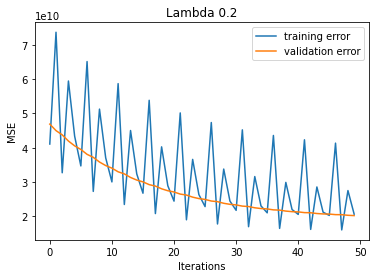

In [15]:
plot(train_cost_iter_world, valid_cost_iter_world, lmbda_world)

## *US*

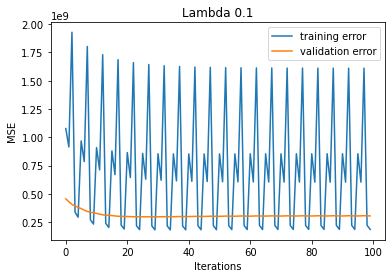

In [16]:
plot(train_cost_iter_US, valid_cost_iter_US, lmbda_US)

# **Optimal Thetas**

## *Worldwide*

In [17]:
print('The Optimal Thetas for the Worldwide Dataset are:')

thetas=f'thetas'

for layer in model_world.network:

    if layer != f'layer{model_world.no_of_layers}':
      
      print(f'{layer}')
      print(f'{model_world.network[layer][thetas]}')

The Optimal Thetas for the Worldwide Dataset are:
layer1
[[0.32799735 0.99706518 0.54608254 0.65058905 0.80004573 0.43057387]
 [1.08675656 0.82688933 0.71047115 0.37042483 1.02354338 1.01588517]
 [0.60150005 0.78264973 0.87106193 0.70470336 0.53804487 0.4314366 ]
 [0.38452969 0.21211353 0.7497386  0.62556321 0.1672801  0.31897397]
 [0.52676477 0.49461791 0.18140939 0.24892253 0.21903332 1.04608281]]
layer2
[[0.953138   1.30449229 0.51720485 1.09592136]
 [1.05251856 1.6956855  0.44791361 0.95842683]
 [1.6190002  1.60452356 0.85932185 1.41810701]
 [1.44264719 1.10686619 0.28703917 1.2957748 ]
 [1.31419272 1.13990613 0.85032351 0.51780276]
 [1.08878671 1.40601717 0.93227311 0.50232009]
 [0.79523408 1.49537856 0.96496559 0.98468761]]
layer3
[[16.76757668  9.9510781   7.65586708]
 [15.92172118 10.04788746  7.17046445]
 [14.45590585  8.86102893  7.00960315]
 [15.96577939  9.67604972  6.85118961]
 [16.22673396  9.43742737  7.01264265]]
layer4
[[364.04807708  58.14407978]
 [274.27599892  43.92

## *US*

In [18]:
print('The Optimal Thetas for the US Dataset are:')

for layer in model_US.network:

    if layer != f'layer{model_US.no_of_layers}':
      
      print(f'{layer}')
      print(f'{model_US.network[layer][thetas]}')

The Optimal Thetas for the US Dataset are:
layer1
[[5.50672521 4.28421629 5.93981205]
 [3.16924959 1.96090024 3.00732055]
 [2.4529272  2.12704676 2.63856483]
 [4.28675542 2.97087904 3.67973578]
 [1.69908553 0.87693472 2.30869377]
 [1.26619252 0.80908262 0.94914656]]
layer2
[[  8.28773372   9.56282877   5.02304155  10.27854097 748.55611822]
 [  6.45344512   7.78956985   4.19539659   9.50550224 742.19398188]
 [  7.38341903   8.23927978   4.37249346   9.54825588 745.72330976]
 [  6.95085091   8.19680174   4.03400651   9.59489694 741.78653477]]
layer3
[[3864.55784746]
 [3826.74199005]
 [3818.50948644]
 [3835.92995024]
 [3831.08081103]
 [3832.92989375]]


# **Saving Thetas and Metadata to File**

Store Model and Dataset properties required in the separate prediction code file

## *Worldwide*

In [19]:
# Save Model properties to special numpy file with extension (.npy) 
with open('/content/Optimal_thetas_of Neural_Network_with_Metadata_Worldwide.npy', 'wb') as file:

  np.save(file, model_world.no_of_layers) # save number of layers

  np.save(file, model_world.activation_fnt) # save activation function

  for layer in model_world.network:

    if layer != f'layer{model_world.no_of_layers}':

      np.save(file, model_world.network[layer][thetas]) #save thetas of each layer

In [20]:
#Append Data properties to the same numpy file
with open('/content/Optimal_thetas_of Neural_Network_with_Metadata_Worldwide.npy', 'ab') as file:
    
    np.save(file, dataset_world.remove_cols) #save column names to be removed from the features
    
    np.save(file, dataset_world.scale) # Whether scaling is done on the dataset or not
    
    np.save(file, dataset_world.scale_type) #If scaling is done, which one is carried out
    
    np.save(file, dataset_world.min) #min value of features
    
    np.save(file, dataset_world.max)#max value of features

## *US*

In [21]:
# Save Model properties to special numpy file with extension (.npy) 
with open('/content/Optimal_thetas_of Neural_Network_with_Metadata_US.npy', 'wb') as file:

  np.save(file, model_US.no_of_layers) # save number of layers

  np.save(file, model_US.activation_fnt) # save activation function

  for layer in model_US.network:

    if layer != f'layer{model_US.no_of_layers}':

      np.save(file, model_US.network[layer][thetas]) #save thetas of each layer

In [22]:
#Append Data properties to the same numpy file
with open('/content/Optimal_thetas_of Neural_Network_with_Metadata_US.npy', 'ab') as file:
    
    np.save(file, dataset_US.remove_cols) #save column names to be removed from the features
    
    np.save(file, dataset_US.scale) # Whether scaling is done on the dataset or not
    
    np.save(file, dataset_US.scale_type) #If scaling is done, which one is carried out
    
    np.save(file, dataset_US.min) #min value of features
    
    np.save(file, dataset_US.max)#max value of features

# **Mean Error on Train, Validation and Test set**

## *Prediction function*

In [23]:
#Perform prediction on the test data
def prediction(model, data):
 
  #args:
  #     model: object of class Network
  #     data: (tuple) containing both X and Y as tuple e.g. (X, Y) 
  

  #calculate output
  model.forward_propagate(data[0])
  predict= model.network[f'layer{model.no_of_layers}']['pred_outputs']
  
  #calculate cost
  cost=model.MSE(model.network[f'layer{model.no_of_layers}']['pred_outputs'], data[1])

  #Scatter plot between predicted and actual values  
  plt.plot(predict, 'ro', label='predicted')
  plt.plot(data[1],'bo', label='actual')
  plt.title("Predicted vs Actual")
  plt.legend()
  plt.axis()
  plt.show()  

  return (predict, cost)

## *Worldwide*

### Mean Error on Training Dataset

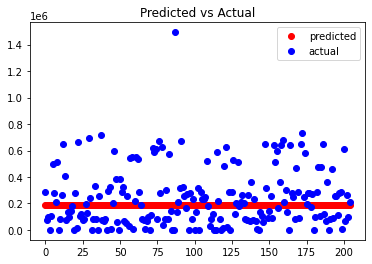

Cost on the train data is:25732209397.63206


In [24]:
_, train_cost_world=prediction(model_world, train_data_world)
print(f'Cost on the train data is:{train_cost_world}')

### Mean Error on Validation Dataset

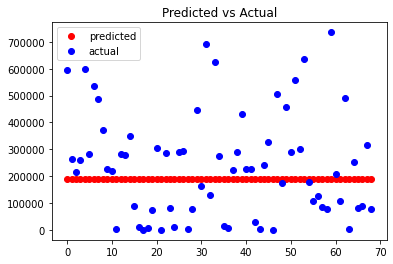

Cost on the validation data is:20134309996.596268


In [25]:
_, valid_cost_world=prediction(model_world, valid_data_world)
print(f'Cost on the validation data is:{valid_cost_world}')

### Mean Error on Test Dataset

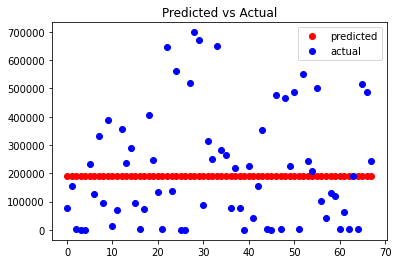

Cost on the test data is:20433292389.27617


In [26]:
_, test_cost_world=prediction(model_world, test_data_world)
print(f'Cost on the test data is:{test_cost_world}')

## *US*

### Mean Error on Training Dataset

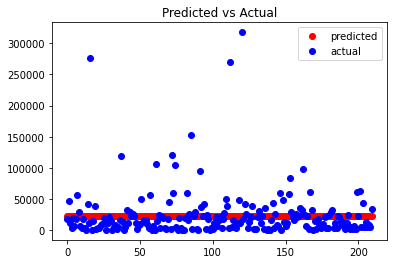

Cost on the training data is:792779546.2609148


In [27]:
_, train_cost_US=prediction(model_US, train_data_US)
print(f'Cost on the training data is:{train_cost_US}')

### Mean Error on Validation Dataset

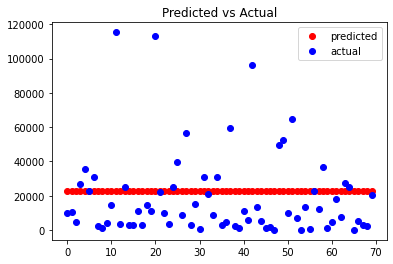

Cost on the validation data is:306393299.9234915


In [28]:
_, valid_cost_US=prediction(model_US, valid_data_US)
print(f'Cost on the validation data is:{valid_cost_US}')

### Mean Error on Test Dataset

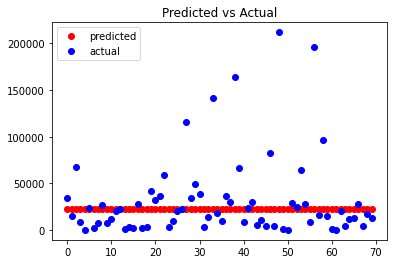

Cost on the test data is:973834710.23216


In [29]:
_, test_cost_US=prediction(model_US, test_data_US)
print(f'Cost on the test data is:{test_cost_US}')